In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
data_dir = "../data/Wind Farm C"
datasets_dir = os.path.join(data_dir, "datasets")
failures_path = os.path.join(data_dir, "event_info.csv")
features_path = os.path.join(data_dir, "feature_description.csv")

Load the failures

In [3]:
failures_df = pd.read_csv(failures_path, delimiter=";")

print("Failures")
print(failures_df.head())
print("Total no. of failures: ", len(failures_df))

Failures
   asset_id  event_id event_label          event_start  event_start_id  \
0        50        55     anomaly  2023-10-29 11:30:00           52848   
1        38        81     anomaly  2023-11-16 01:30:00           52704   
2        21        47     anomaly  2023-12-22 15:00:00           52416   
3         2        12     anomaly  2023-06-27 00:00:00           52560   
4        34         4     anomaly  2023-07-31 10:00:00           52992   

             event_end  event_end_id  \
0  2023-11-15 15:30:00         55320   
1  2023-11-18 14:00:00         53067   
2  2023-12-27 13:40:00         53128   
3  2023-07-19 15:00:00         55818   
4  2023-08-19 10:00:00         55728   

                                   event_description  
0  Harting plug Nacelle/HUB damaged + NCR20_HUB: ...  
1  Converter Failure from 17.11 12:30 - 18.11. 13...  
2  Failure due to Rotorbrake and Hydraulic proble...  
3  10115 : Oil level error, two-pump mode + Oil L...  
4                23020 : Axis 

Load the features

In [4]:
features_df = pd.read_csv(features_path, delimiter=";")

print("Features")
print(features_df.head())

Features
  sensor_name                  statistics_type                    description  \
0    sensor_0  maximum,minimum,std_dev,average           ABB-LS Input K1, IL1   
1    sensor_1  maximum,minimum,std_dev,average         Generator acceleration   
2     power_2  average,maximum,std_dev,minimum            ABB-LS Active Power   
3    sensor_3  average,maximum,minimum,std_dev  Active power aeration motor A   
4    sensor_4  average,maximum,minimum,std_dev  Active power aeration motor B   

    unit  is_angle  is_counter  
0      A     False       False  
1  rpm/s     False       False  
2     kW     False       False  
3      %     False       False  
4      %     False       False  


In [5]:
sensor_files = sorted(os.listdir(datasets_dir))
print(f"\nFound {len(sensor_files)} sensor data files")
print("First 5 files: ", sensor_files[:5])


Found 58 sensor data files
First 5 files:  ['1.csv', '11.csv', '12.csv', '15.csv', '16.csv']


Inspecting sensor data, event_info contains the asset id, wheres the datasets contain the corresponding datasets for each id

In [6]:
asset_id = 50
sensor_file = os.path.join(datasets_dir, f"{asset_id}.csv")

# load the data
df_sensor = pd.read_csv(sensor_file, delimiter=";")

# Convert timestamp to datetime objects
print("Columns:", df_sensor.columns.tolist())

# slight peak of data
print(df_sensor.head())

Columns: ['time_stamp', 'asset_id', 'id', 'train_test', 'status_type_id', 'sensor_0_avg', 'sensor_0_max', 'sensor_0_min', 'sensor_0_std', 'sensor_1_avg', 'sensor_1_max', 'sensor_1_min', 'sensor_1_std', 'power_2_avg', 'power_2_max', 'power_2_min', 'power_2_std', 'sensor_3_avg', 'sensor_3_max', 'sensor_3_min', 'sensor_3_std', 'sensor_4_avg', 'sensor_4_max', 'sensor_4_min', 'sensor_4_std', 'power_5_avg', 'power_5_max', 'power_5_min', 'power_5_std', 'power_6_avg', 'power_6_max', 'power_6_min', 'power_6_std', 'sensor_7_avg', 'sensor_7_max', 'sensor_7_min', 'sensor_7_std', 'sensor_8_avg', 'sensor_8_max', 'sensor_8_min', 'sensor_8_std', 'sensor_9_avg', 'sensor_9_max', 'sensor_9_min', 'sensor_9_std', 'sensor_10_avg', 'sensor_10_max', 'sensor_10_min', 'sensor_10_std', 'sensor_11_avg', 'sensor_11_max', 'sensor_11_min', 'sensor_11_std', 'sensor_12_avg', 'sensor_12_max', 'sensor_12_min', 'sensor_12_std', 'sensor_13_avg', 'sensor_13_max', 'sensor_13_min', 'sensor_13_std', 'sensor_14_avg', 'sensor_1

In [7]:
print(df_sensor.dtypes[:10])

time_stamp         object
asset_id            int64
id                  int64
train_test         object
status_type_id      int64
sensor_0_avg      float64
sensor_0_max      float64
sensor_0_min      float64
sensor_0_std      float64
sensor_1_avg      float64
dtype: object


In [8]:
# Convert time_stamp object to datetime
df_sensor['time_stamp'] = pd.to_datetime(df_sensor['time_stamp'])

# Sort by time
df_sensor = df_sensor.sort_values('time_stamp')

# Set timestamp to index
df_sensor.set_index('time_stamp', inplace=True)

print(df_sensor.dtypes[:10])

asset_id            int64
id                  int64
train_test         object
status_type_id      int64
sensor_0_avg      float64
sensor_0_max      float64
sensor_0_min      float64
sensor_0_std      float64
sensor_1_avg      float64
sensor_1_max      float64
dtype: object


In [9]:
df_sensor.columns

Index(['asset_id', 'id', 'train_test', 'status_type_id', 'sensor_0_avg',
       'sensor_0_max', 'sensor_0_min', 'sensor_0_std', 'sensor_1_avg',
       'sensor_1_max',
       ...
       'wind_speed_236_min', 'wind_speed_236_std', 'wind_speed_235_avg',
       'wind_speed_235_max', 'wind_speed_235_min', 'wind_speed_235_std',
       'wind_speed_237_avg', 'wind_speed_237_max', 'wind_speed_237_min',
       'wind_speed_237_std'],
      dtype='object', length=956)

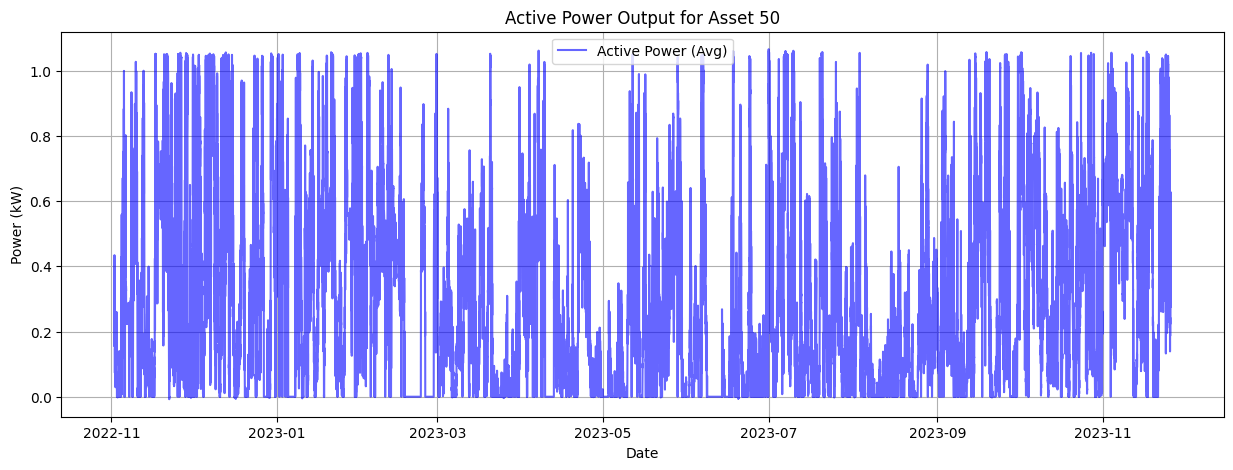

In [10]:
# Visualization (requirement for Step 1)
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(df_sensor.index, df_sensor['power_2_avg'], label='Active Power (Avg)', color='blue', alpha=0.6)
plt.title(f"Active Power Output for Asset {asset_id}")
plt.xlabel('Date')
plt.ylabel('Power (kW)')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Get the failure start time for asset 50
failure_row = failures_df[failures_df['asset_id'] == asset_id].iloc[0]
failure_time = pd.to_datetime(failure_row['event_start'])

In [12]:
print(f"Target failure time:", {failure_time})

Target failure time: {Timestamp('2023-10-29 11:30:00')}


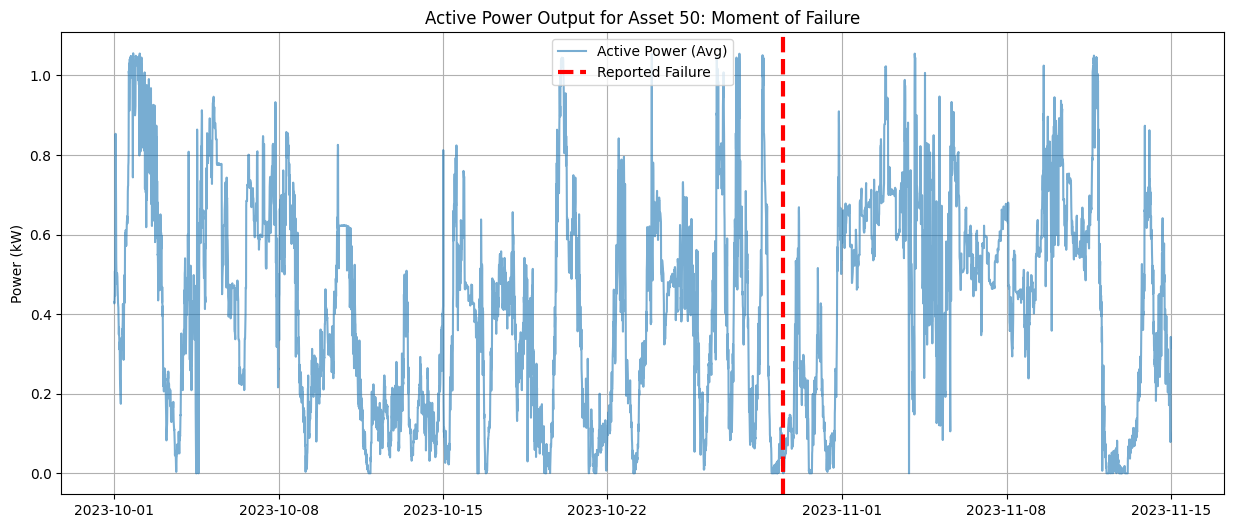

In [13]:
start_zoom = pd.to_datetime('2023-10-01')
end_zoom = pd.to_datetime('2023-11-15')

# filter the data for this window
mask = (df_sensor.index >= start_zoom) & (df_sensor.index <= end_zoom)
df_zoom = df_sensor.loc[mask]

# Now plot with merged red dot on the Active Power output for asset 50
plt.figure(figsize=(15,6))
plt.plot(df_zoom.index, df_zoom['power_2_avg'], label='Active Power (Avg)', alpha=0.6)
plt.axvline(x=failure_time, color='red', linestyle='--', linewidth=3, label='Reported Failure')
plt.title(f"Active Power Output for Asset {asset_id}: Moment of Failure")
plt.ylabel('Power (kW)')
plt.legend()
plt.grid(True)
plt.show()

Feature Selection

In [14]:
print(f"Original feauture count: {len(df_sensor.columns)}")

Original feauture count: 956


In [15]:
# Drop the columns which have one unique value
nunique = df_sensor.nunique()
cols_to_drop = nunique[nunique == 1].index
df_reduced = df_sensor.drop(cols_to_drop, axis=1)

In [16]:
print(f"New feauture count: {len(df_reduced.columns)}")

New feauture count: 935


In [17]:
# Remove highly correlated features
corr_matrix = df_reduced.corr(numeric_only=True).abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features that correlation > 0.95
to_drop = [column for column in upper.columns if any (upper[column] > 0.95)]
df_final_features = df_reduced.drop(to_drop, axis=1)

print(f"Final feauture count:", len(df_final_features.columns))

Final feauture count: 313


In [19]:
good_features = df_final_features.columns.tolist()

Save feature list to file

In [20]:
import json


feature_list_path = "../data/Wind Farm C/selected_features.json"

# Save list
with open(feature_list_path, "w") as f:
    json.dump(good_features, f)

print(f"Feature list saved to {feature_list_path}")

Feature list saved to ../data/Wind Farm C/selected_features.json
